In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [4]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
reg = LinearRegression().fit(train_X, train_y)

In [6]:
reg.score(train_X, train_y)

0.4555406785040048

In [7]:
mean_squared_error(reg.predict(train_X), train_y)

29840.121250865297

In [8]:
scores = cross_validate(reg, train_X, train_y, cv=3, 
                        scoring=('neg_mean_squared_error'))

In [9]:
scores

{'fit_time': array([0.0232141 , 0.01433897, 0.01165485]),
 'score_time': array([0.00282693, 0.00265002, 0.00276494]),
 'test_score': array([-29836.8590711 , -29618.75539266, -30344.6536926 ])}

In [10]:
mean_squared_error(reg.predict(test_X), test_y)

31021.024399854457

In [11]:
#Посмотрим сколько уникальных значений в каждом столбце, чтобы определить категориальные и количественные столбцы
df.nunique().sort_values()

models_light-and-commercial           2
gear-type                             3
configurations_safety-rating          3
models_group                          4
configurations_front-brake            5
valvetrain                            5
supply-system                         5
engine-type                           5
cylinders-order                       7
engine-feeding                        9
back-suspension                      11
cylinders-value                      11
configurations_seats                 34
models_country-from                  36
power-electro-kw                     66
battery-capacity                     75
supergen_year-stop                   97
engine-stop                          97
engine-start                         98
configurations_tank-volume          110
compression                         188
consumption-mixed                   205
max-speed                           268
configurations_back-wheel-base      450
models_male                         469


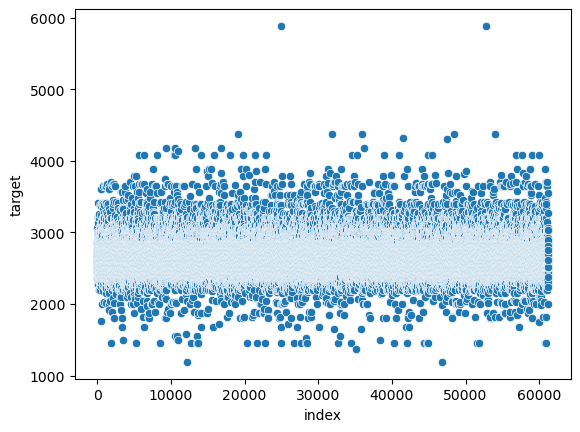

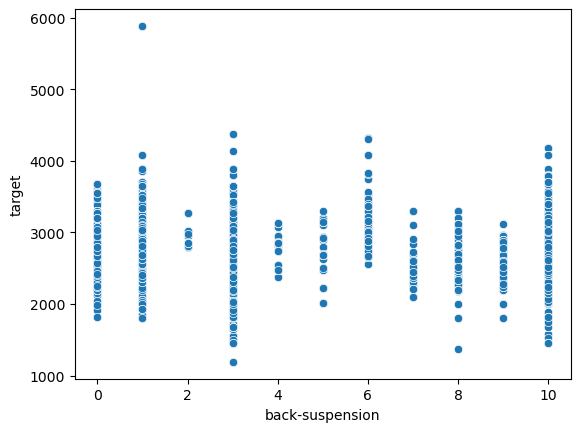

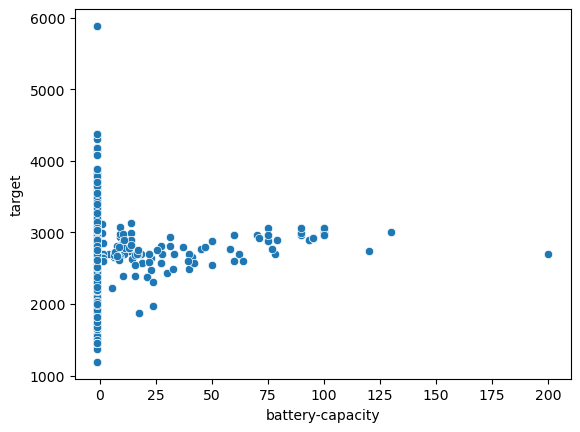

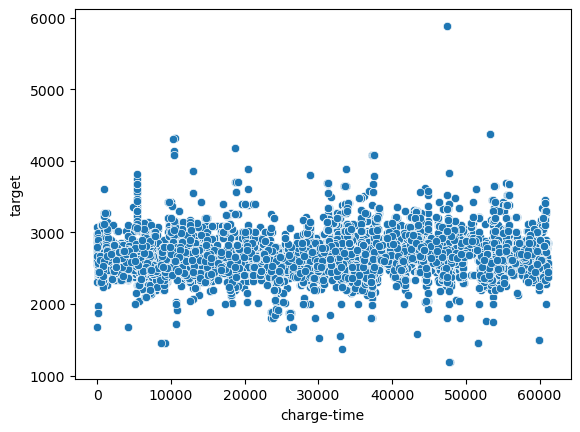

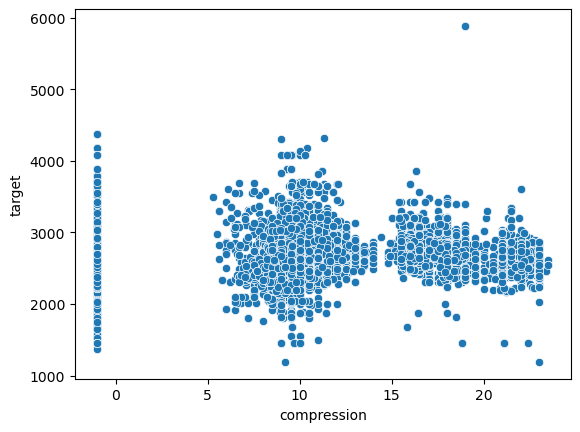

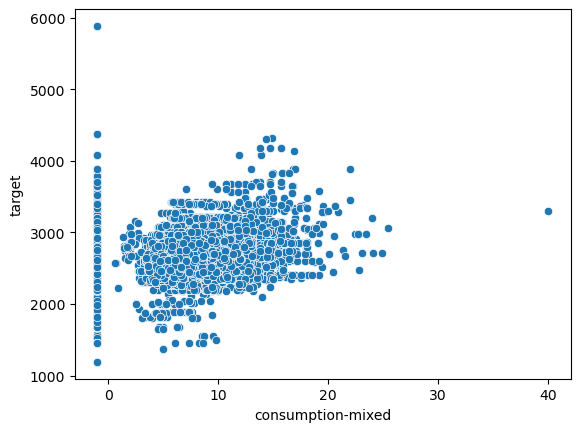

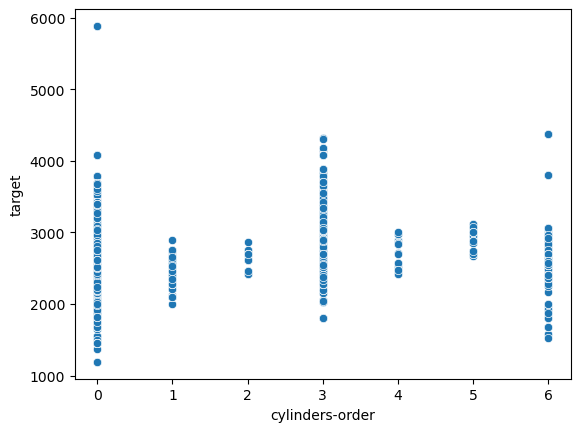

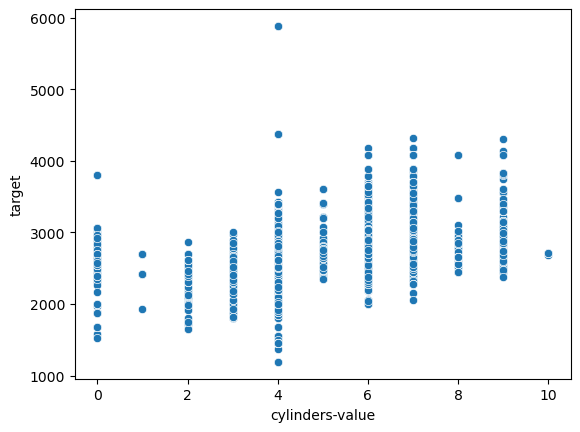

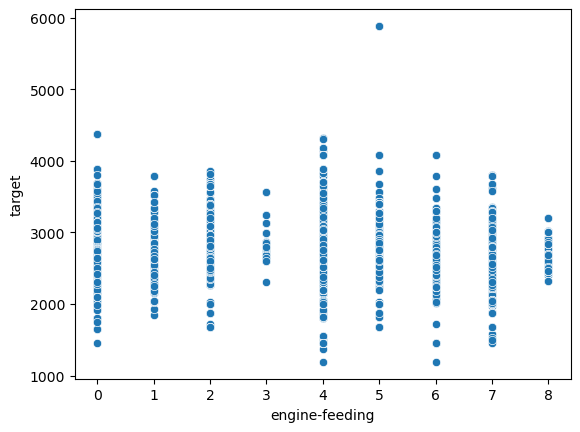

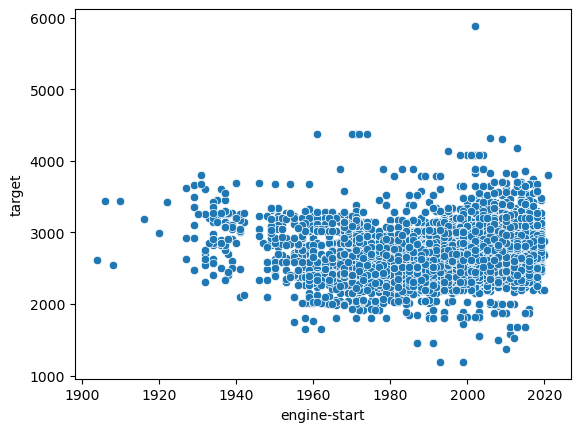

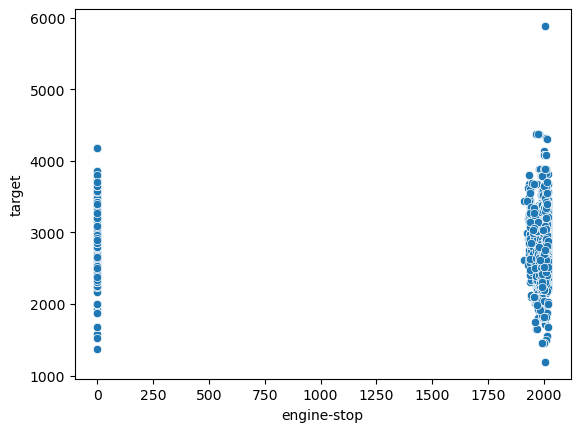

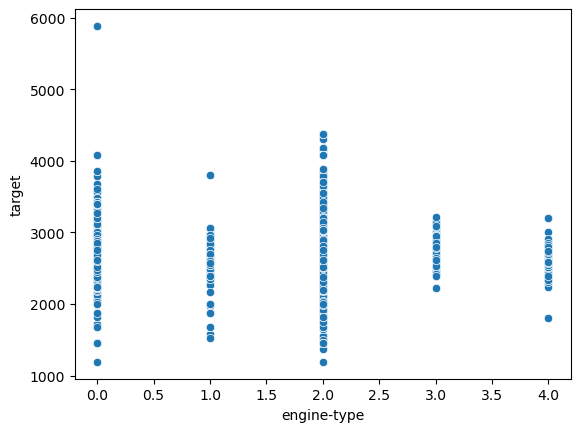

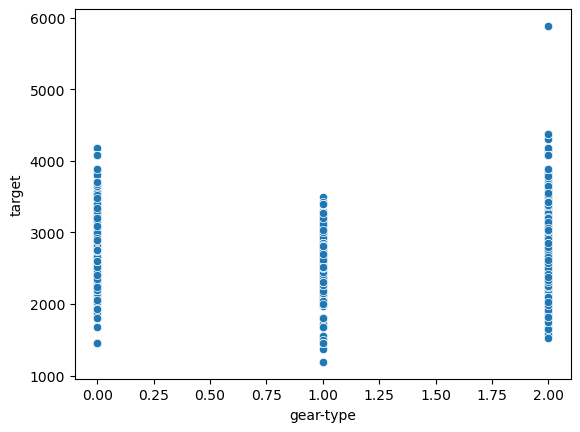

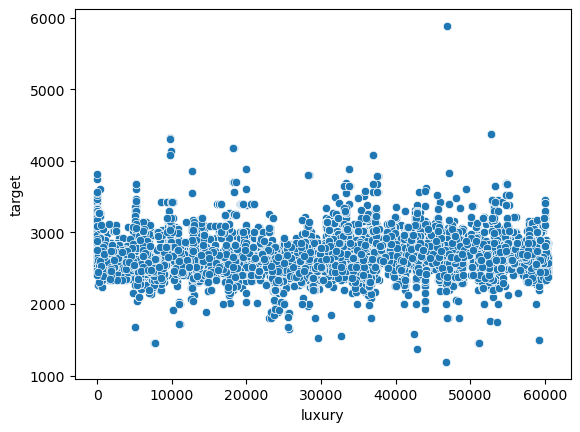

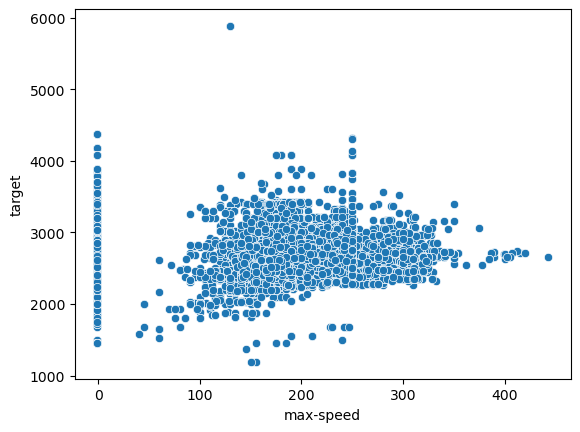

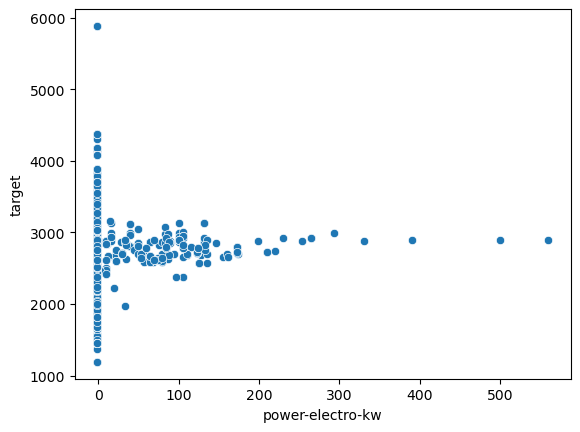

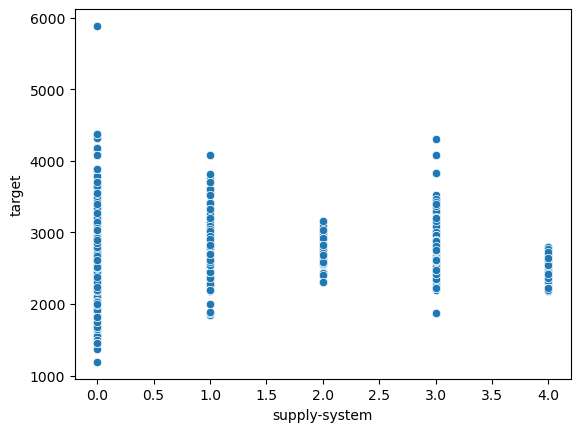

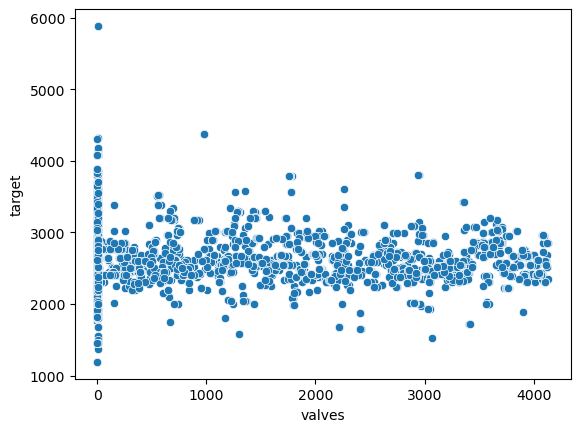

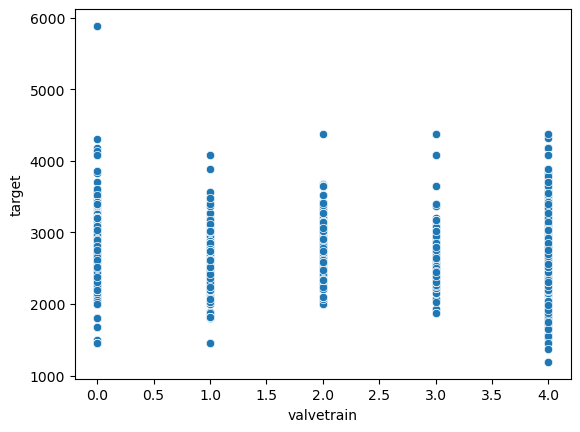

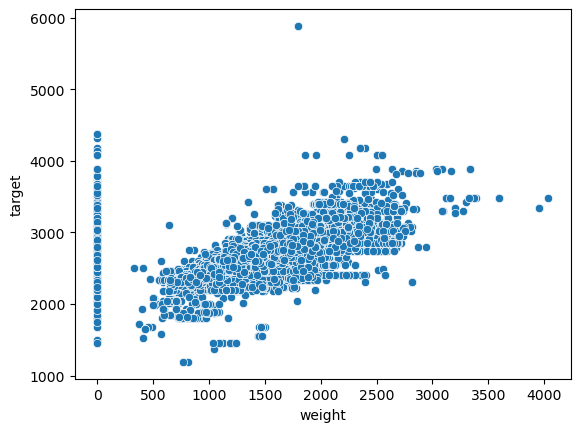

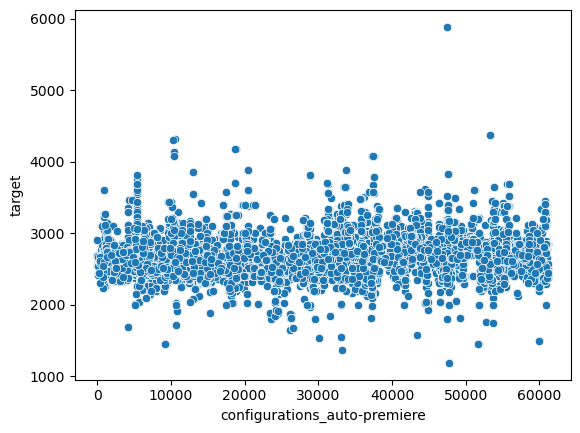

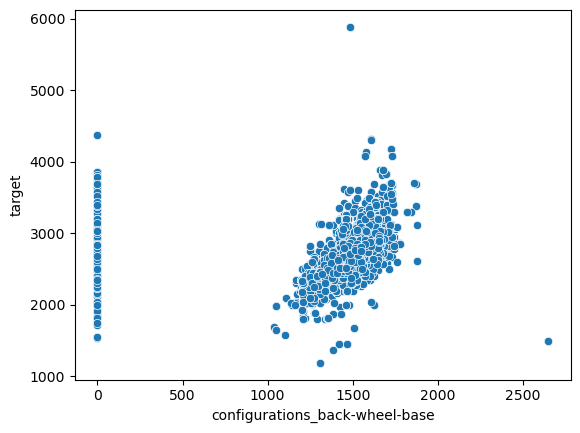

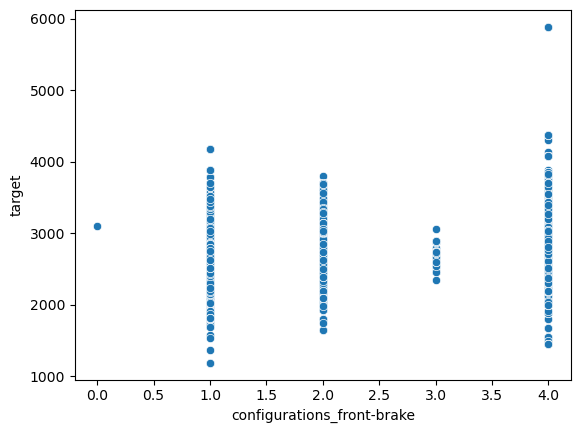

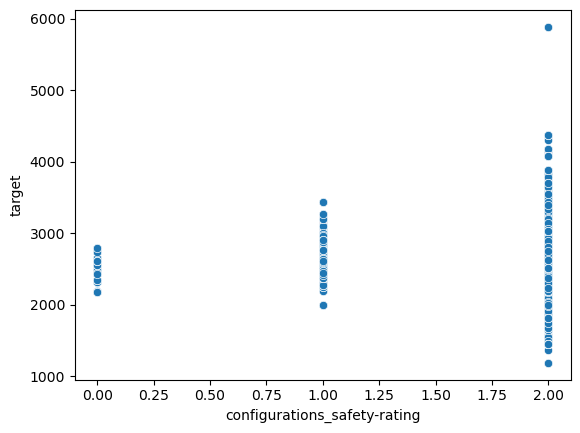

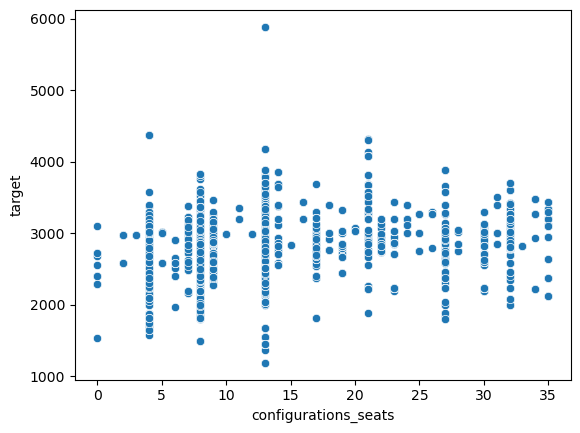

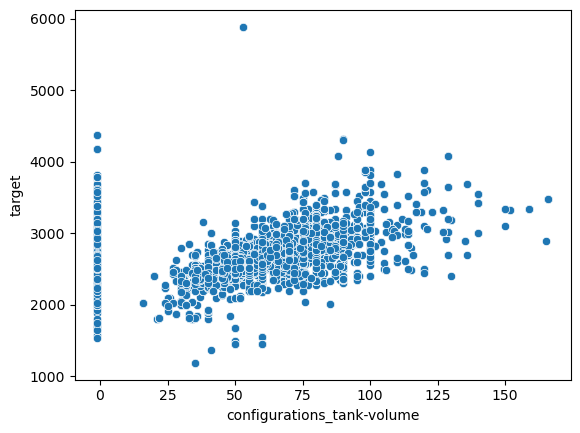

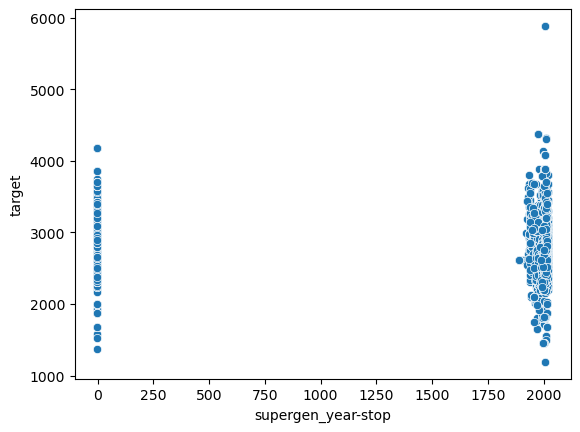

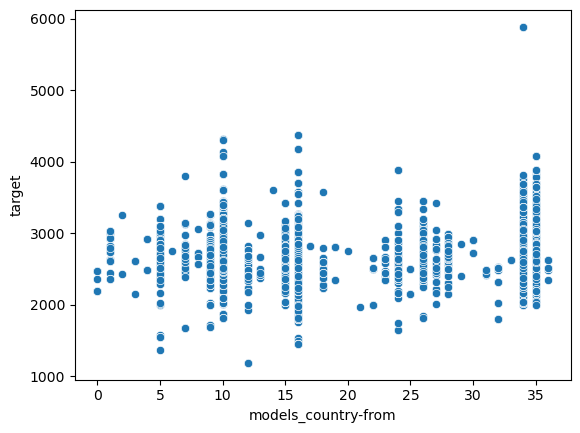

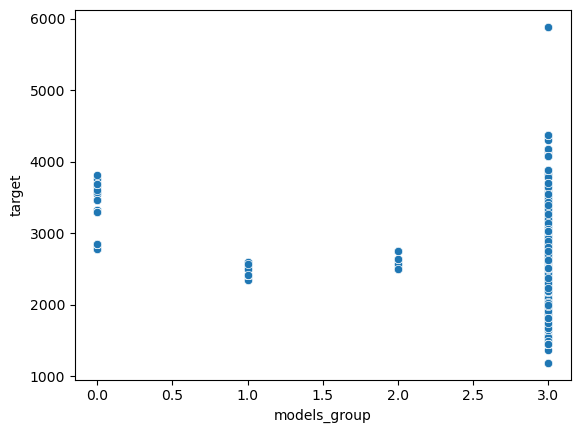

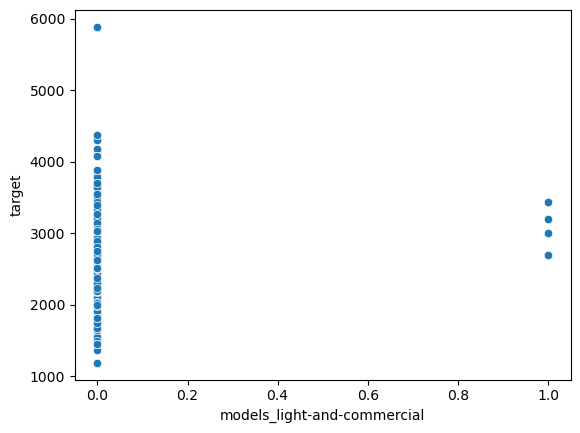

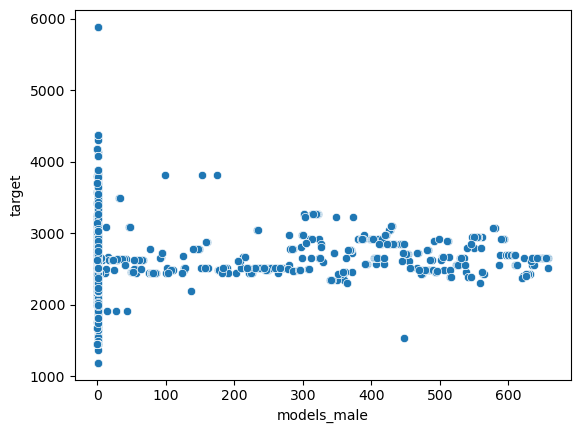

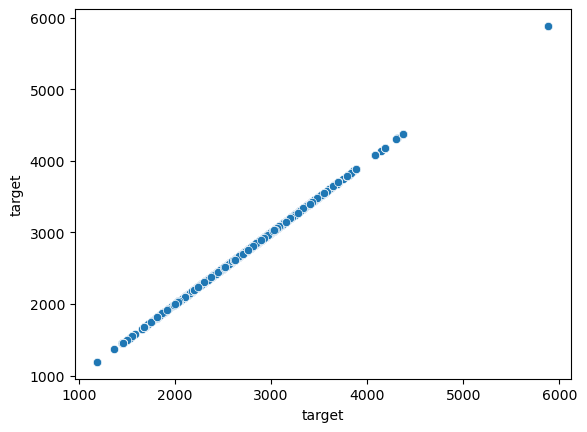

In [12]:
#Построим диаграмму рассеяния для анализа значений
for factor in df.columns:
    sns.scatterplot(data=df, x=factor, y='target')
    plt.show()

Построив диаграмму рассеяния, были обнаружены отрицательные значения в количественных столбцах, где по логике этих отрицательных значений быть не должно. Ислледуем подробнее эти столбцы

In [13]:
df.weight.value_counts().sort_values()

 2321.0       1
 2028.0       1
 1986.0       1
 714.0        1
 1904.0       1
           ... 
 1090.0     247
 1280.0     248
 1430.0     248
 1320.0     257
-1.0       9399
Name: weight, Length: 1610, dtype: int64

In [14]:
df.compression.value_counts().sort_values()

 6.90        1
 5.30        1
 16.90       1
 19.10       1
 6.73        1
          ... 
 9.00     1499
 9.50     3018
 10.50    3180
 10.00    4057
-1.00     9320
Name: compression, Length: 188, dtype: int64

In [15]:
df['configurations_tank-volume'].describe()

count    43245.000000
mean        53.300937
std         24.845687
min         -1.000000
25%         46.000000
50%         58.000000
75%         68.000000
max        166.000000
Name: configurations_tank-volume, dtype: float64

In [16]:
df['configurations_tank-volume'].value_counts().sort_values()

 112.0       1
 165.0       1
 26.0        1
 116.0       2
 128.0       2
          ... 
 55.0     3124
 70.0     3305
 50.0     3544
 60.0     4172
-1.0      5408
Name: configurations_tank-volume, Length: 110, dtype: int64

In [17]:
df['configurations_back-wheel-base'].value_counts().sort_values()

 1750.0       1
 1860.0       1
 1687.0       1
 1728.0       1
 1353.0       1
           ... 
 1455.0     754
 1470.0     808
 1450.0     910
 1460.0    1249
-1.0       3067
Name: configurations_back-wheel-base, Length: 450, dtype: int64

По данным столбцам мы наблюдаем следующую картину. В количественных столбцах, которые обозначают физические величины, есть значение равные -1, причем их довольно много. По хорошему таких значений быть не должно, поэтому избавимся от них.

In [18]:
df.columns[df.nunique() > 100][1:12]

Index(['charge-time', 'compression', 'consumption-mixed', 'luxury',
       'max-speed', 'valves', 'weight', 'configurations_auto-premiere',
       'configurations_back-wheel-base', 'configurations_tank-volume',
       'models_male'],
      dtype='object')

In [26]:
df

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
3,5,0,-1.0,41405,10.3,-1.0,0,4,4,2000,...,4,2,13,55.0,2003.0,10,3,0,1,2513
4,7,8,-1.0,22523,19.0,-1.0,0,4,8,2000,...,4,1,13,62.0,2005.0,10,3,0,1,2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43240,61224,9,-1.0,34558,11.2,6.6,0,4,4,2004,...,1,2,13,47.0,2016.0,15,3,0,1,2510
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808
43242,61226,3,-1.0,8958,10.0,9.3,0,4,4,1991,...,4,2,13,55.0,1999.0,16,3,0,1,2520
43243,61227,3,-1.0,20293,8.5,-1.0,0,5,4,2002,...,1,2,13,70.0,2004.0,28,3,0,1,2755


In [39]:
df[['charge-time', 'compression', 'consumption-mixed', 'luxury',
       'max-speed', 'valves', 'weight', 'configurations_auto-premiere',
       'configurations_back-wheel-base', 'configurations_tank-volume',
       'models_male']] = df[['charge-time', 'compression', 'consumption-mixed', 'luxury',
       'max-speed', 'valves', 'weight', 'configurations_auto-premiere',
       'configurations_back-wheel-base', 'configurations_tank-volume',
       'models_male']].replace({-1.0: None})

In [40]:
df_cleaned = df.dropna()
df_cleaned

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648
5,8,8,-1.0,22100,9.6,6.0,0,4,2,2014,...,4,2,13,45.0,2017.0,10,3,0,1,2468
6,9,3,-1.0,10569,16.5,4.7,0,4,5,2019,...,4,1,13,48.0,-1.0,34,3,0,1,2670
16,20,3,-1.0,2718,18.0,5.1,0,4,5,2003,...,1,2,13,52.0,2011.0,10,3,0,1,2716
19,24,6,-1.0,44832,9.3,10.5,3,7,2,2015,...,4,2,8,90.0,2017.0,34,3,0,1,2746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43234,61216,8,-1.0,12898,10.5,6.1,0,4,4,2007,...,4,1,13,52.0,2014.0,10,3,0,1,2614
43235,61217,3,-1.0,6020,11.2,9.3,3,6,2,2019,...,4,2,13,75.0,-1.0,10,3,0,1,2895
43238,61222,3,-1.0,44295,17.0,7.1,0,6,5,2005,...,4,1,13,63.0,2010.0,10,3,0,1,2760
43241,61225,3,-1.0,38268,9.6,5.8,0,4,2,2013,...,4,2,13,65.0,2015.0,10,3,0,1,2808


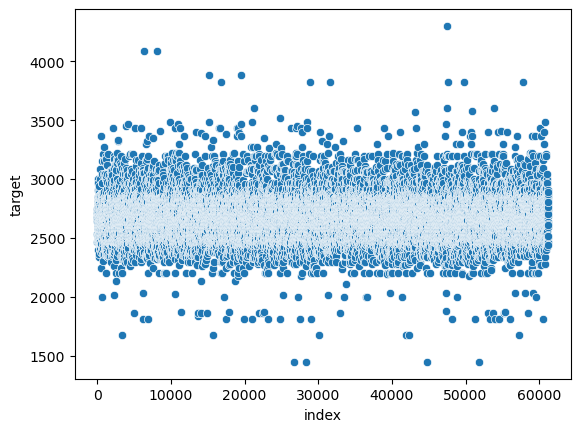

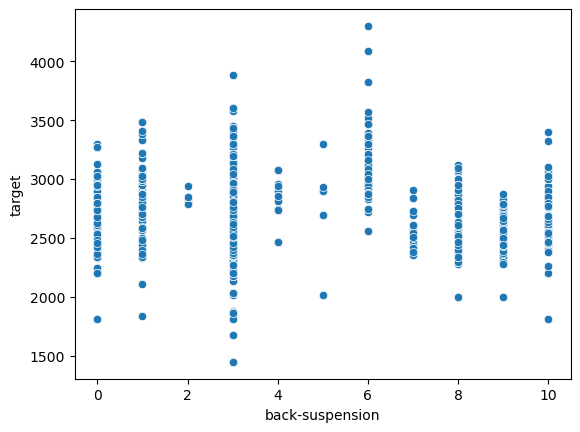

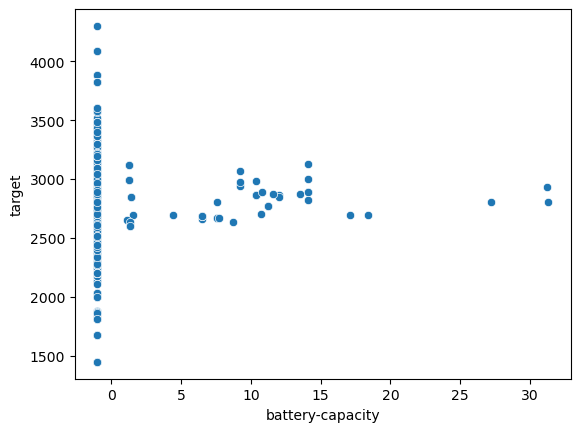

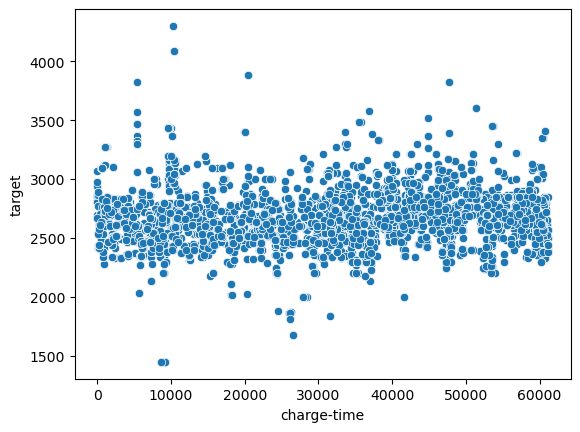

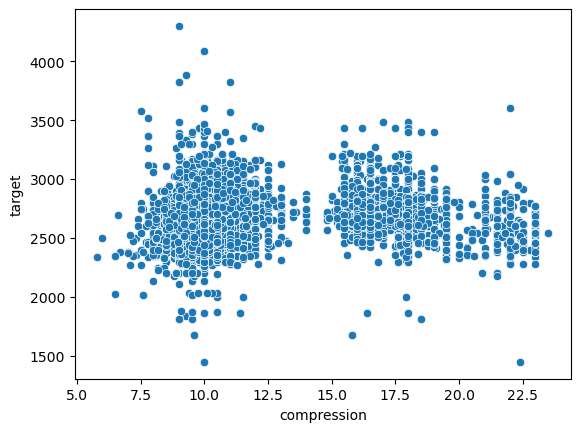

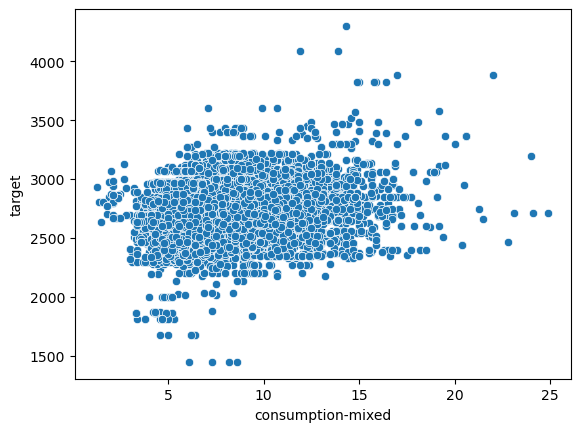

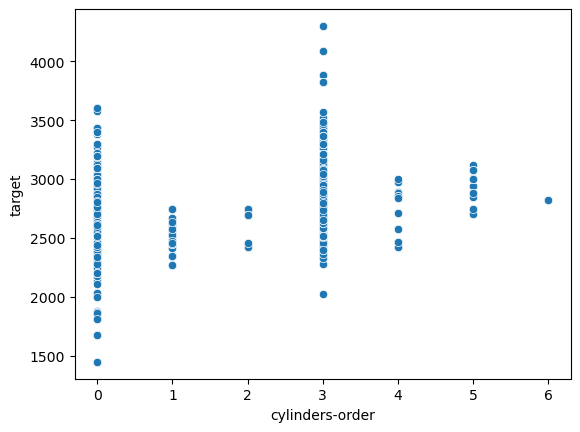

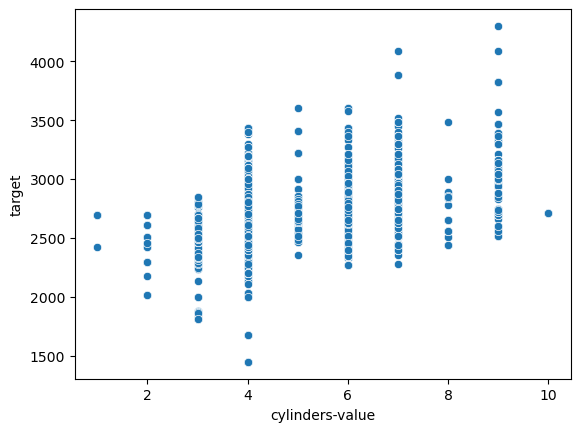

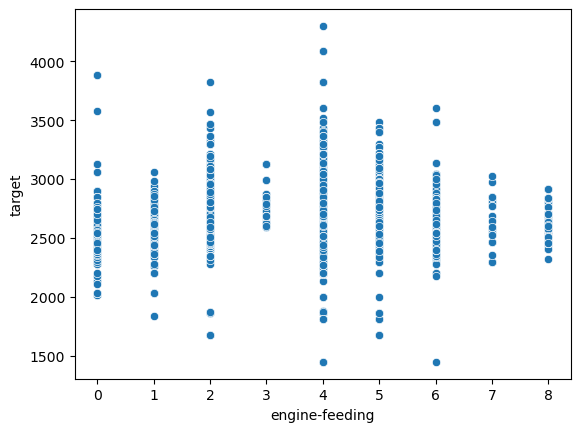

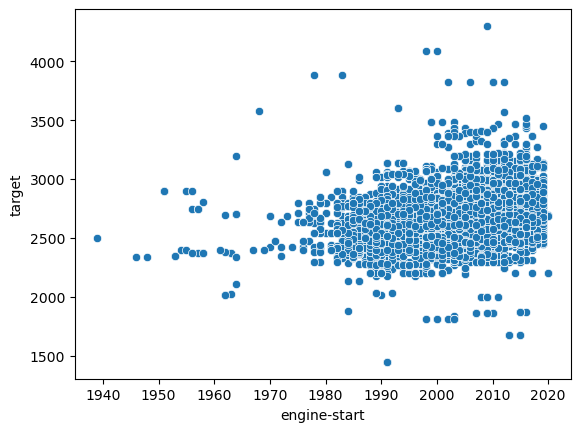

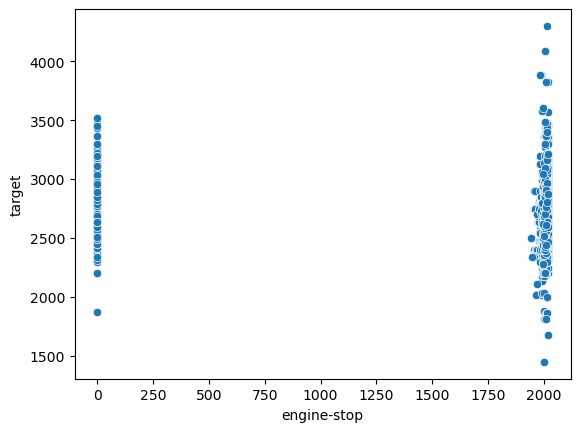

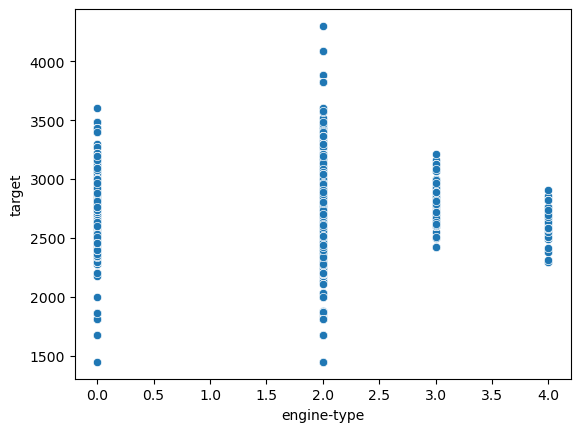

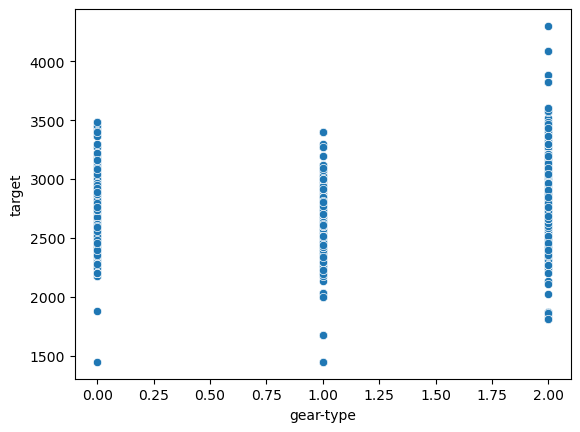

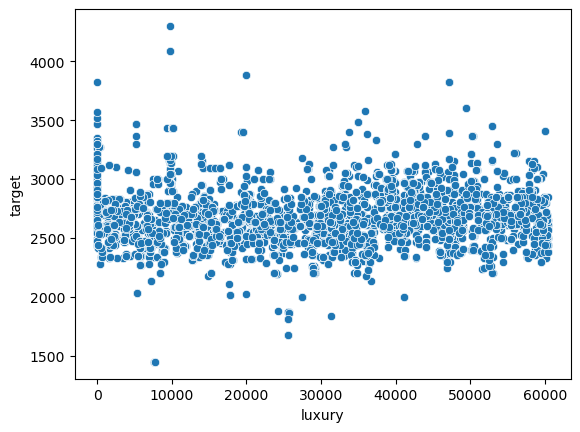

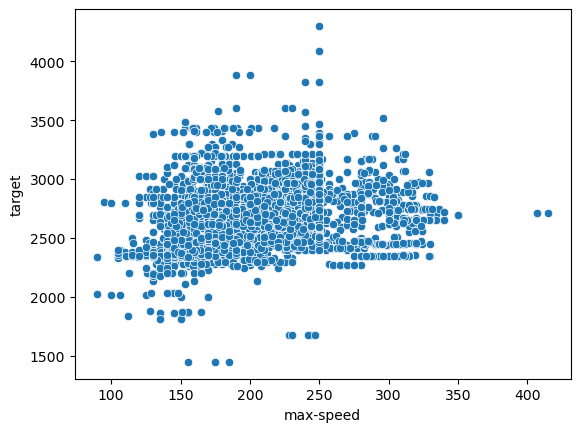

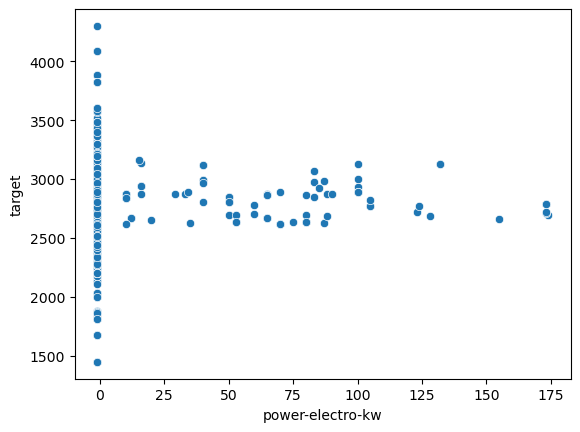

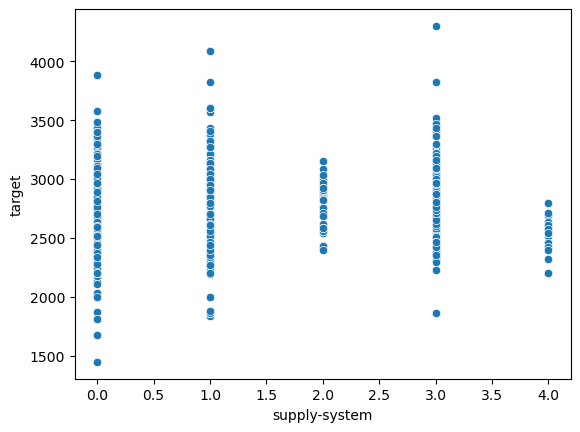

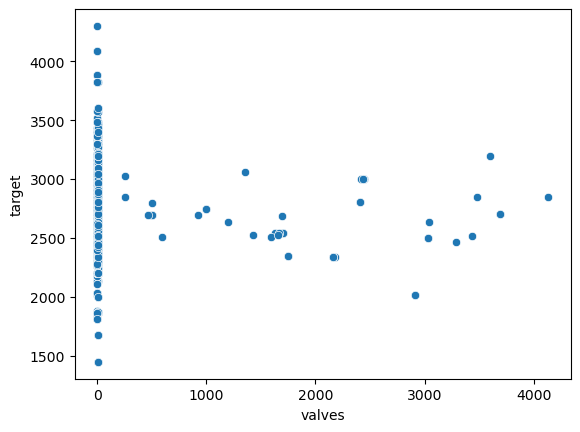

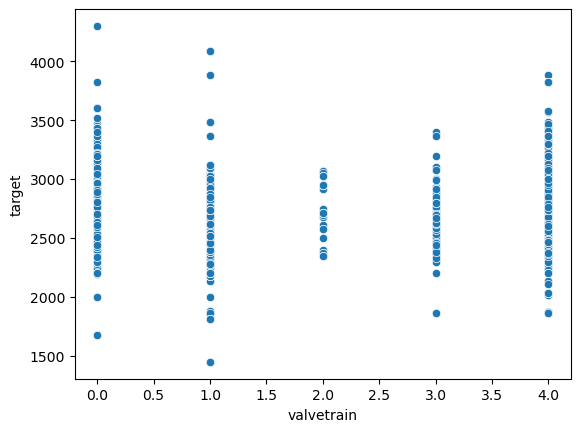

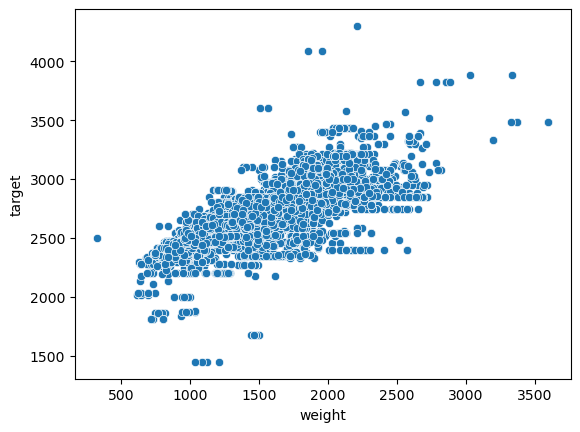

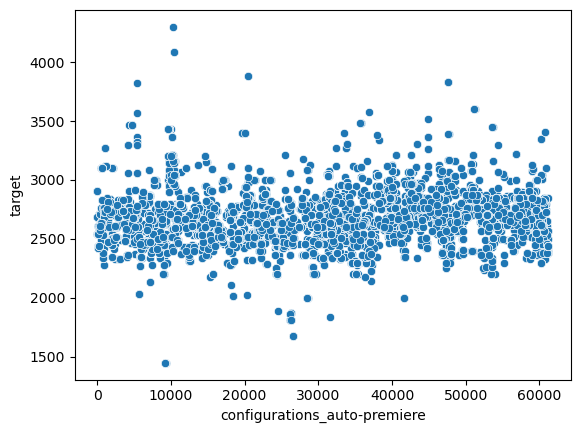

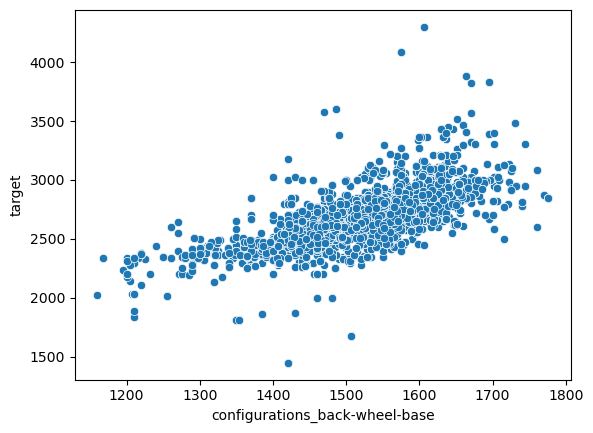

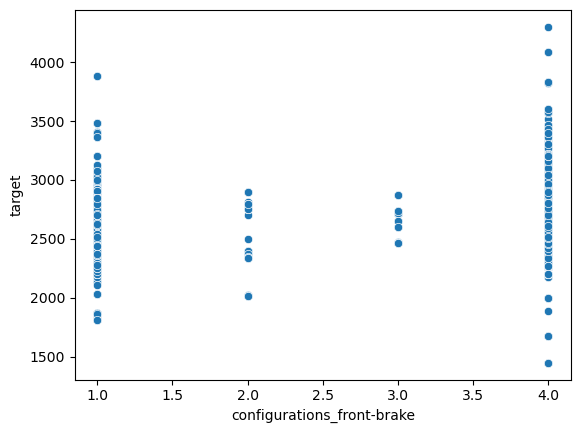

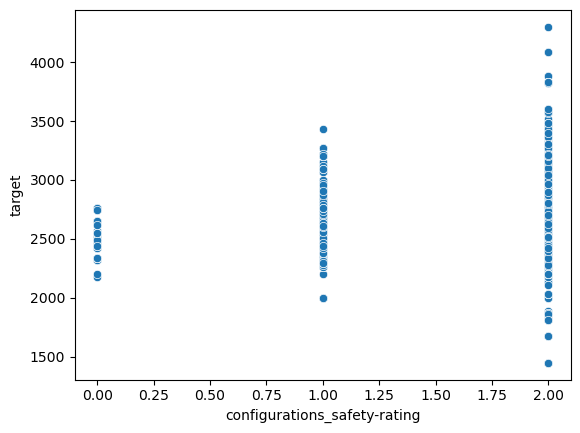

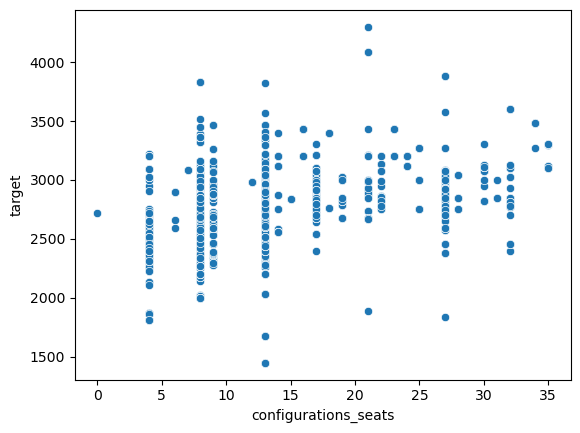

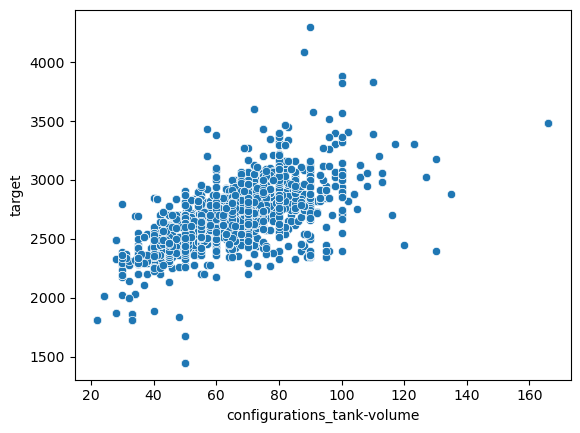

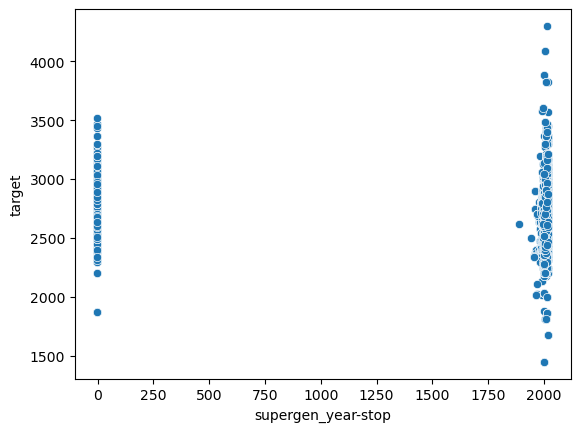

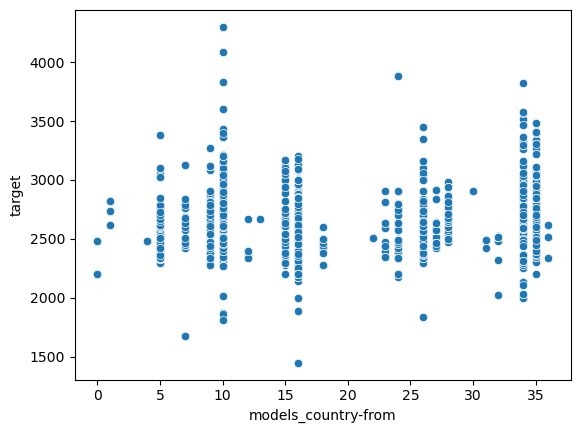

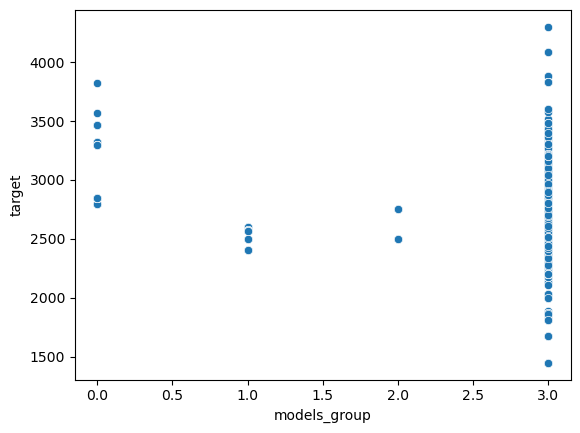

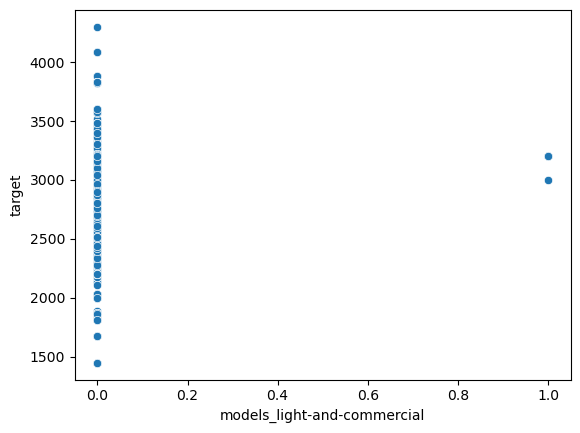

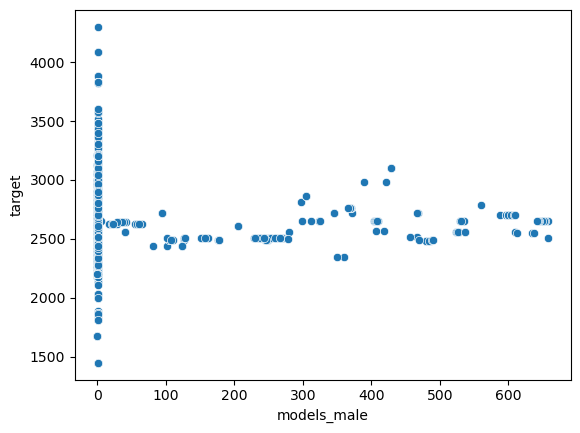

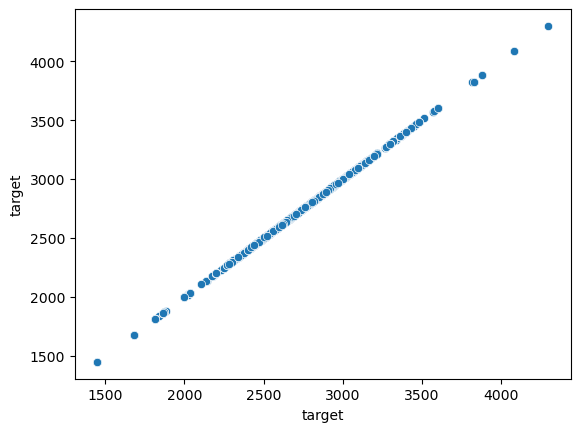

In [41]:
for i in df_cleaned.columns:
    sns.scatterplot(data=df_cleaned, x=i, y='target')
    plt.show()

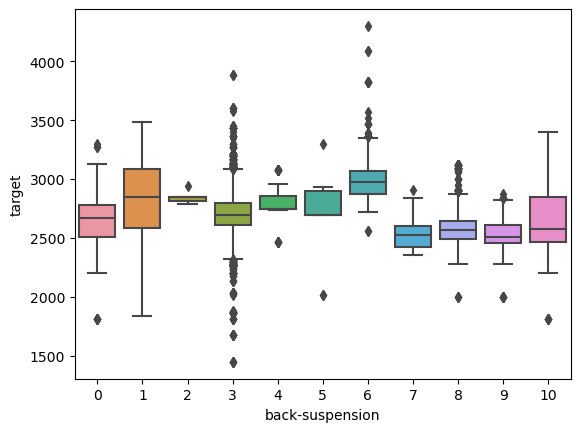

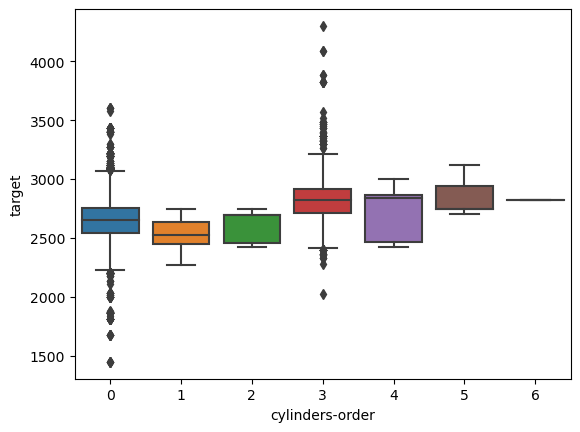

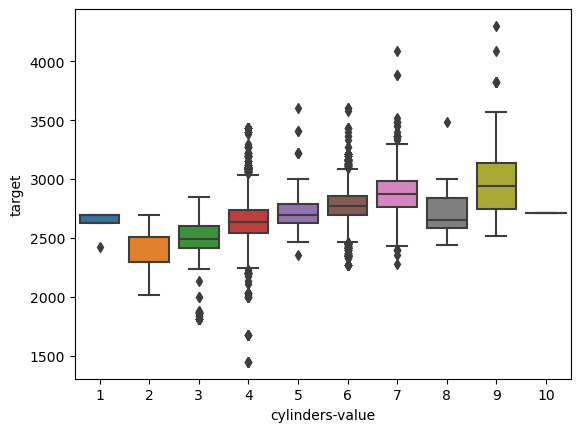

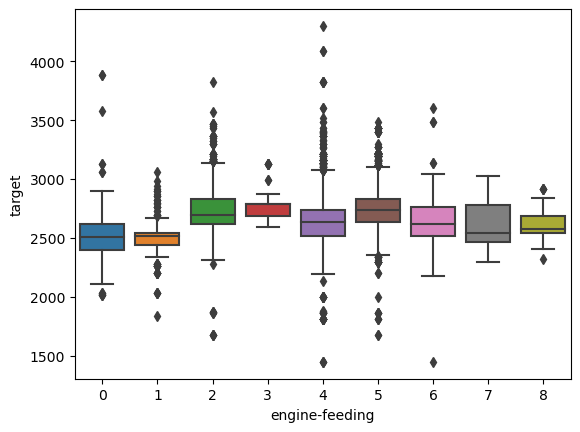

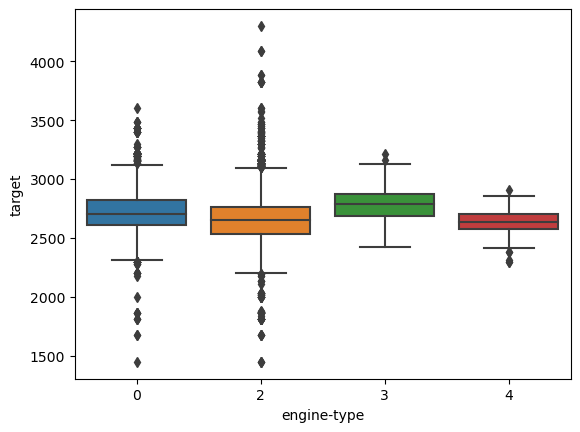

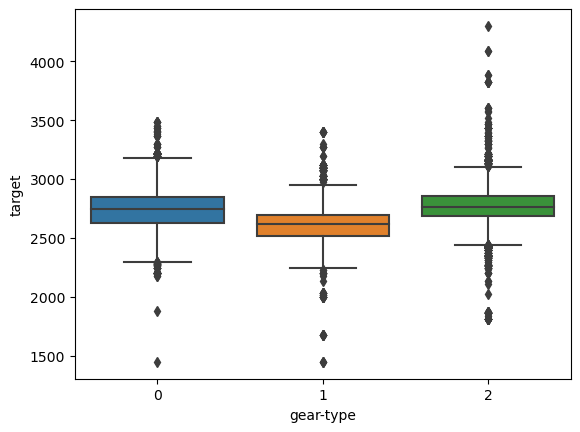

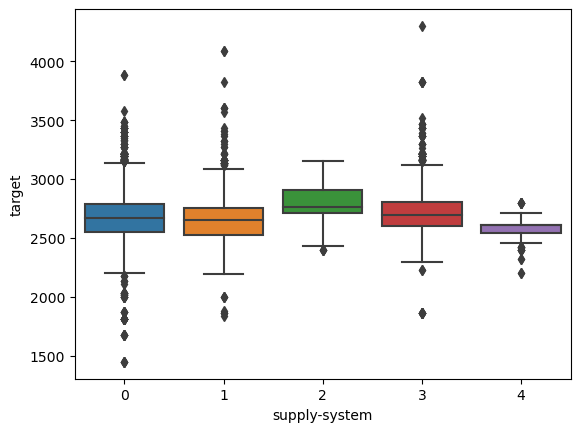

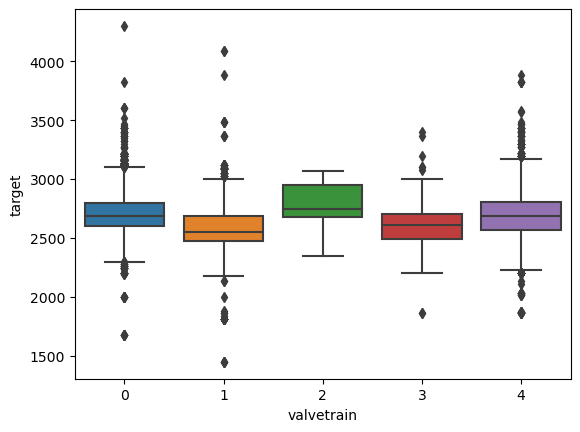

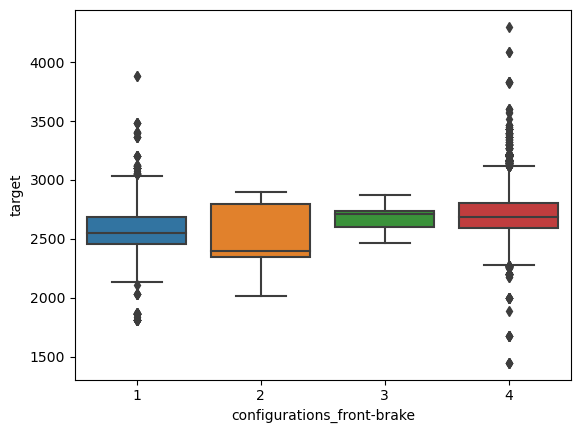

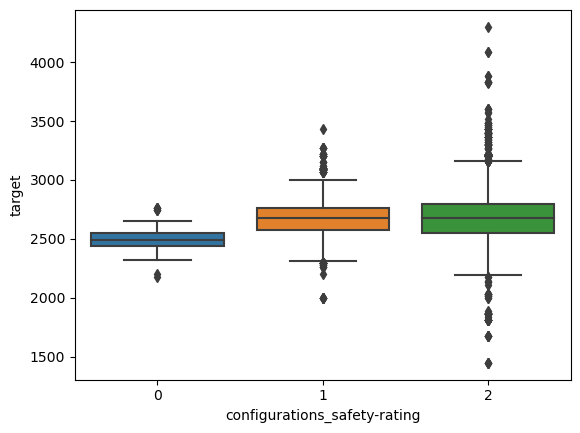

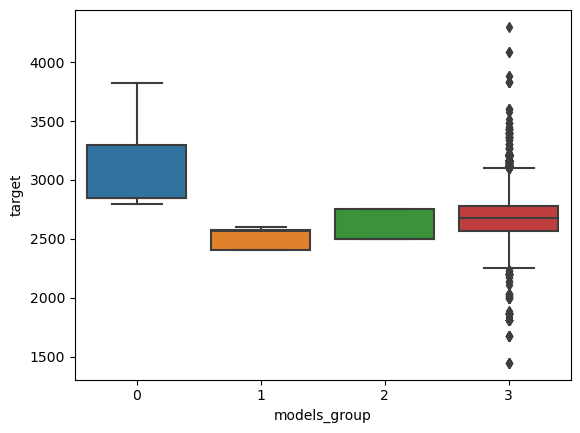

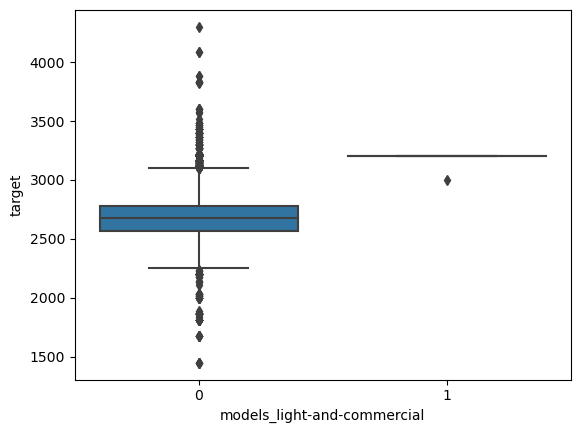

In [48]:
for i in df_cleaned.columns[df_cleaned.nunique() < 15]:
    sns.boxplot(data=df_cleaned, x=i, y='target')
    plt.show()

In [42]:
y = df_cleaned.target
data = df_cleaned.drop('target', axis=1)
train_X, test_X, train_y, test_y = train_test_split(data, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(train_X, train_y)
reg.score(train_X, train_y)

0.7178179360721937